In [242]:
import pandas as pd
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

%matplotlib inline

## Classificaiton

In [2]:
from sklearn.svm import SVC, LinearSVC 

## SVC: support vector machine

- 在libsvm的基础上实现
- 时间复杂度： more than $O(n^2)$
- 对于大的样本量（比如多于10000个样本），难以很好的scale
- 多类分类问题，是基于 OVO（one vs one）的算法
- 可以实现不同的kernel函数

In [3]:
svc = SVC()

In [4]:
print svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


- C : 浮点（float），默认值为1.0

\begin{align}
& J(\boldsymbol{w}) = \sum_{i=1}^m{\max(1-y_i{\boldsymbol{w}^T\boldsymbol{x}_i, 0)}}+\lambda \|\boldsymbol{w} \|^2 \\
\Rightarrow \ \ & J(\boldsymbol{w}) = C\sum_{i=1}^m{\max(1-y_i{\boldsymbol{w}^T\boldsymbol{x}_i, 0)}}+ \|\boldsymbol{w} \|^2 \\
\end{align}

    C是其他算法里正则化强度 $\lambda$ 的倒数，C越大，正则化强度越小， 容易过拟合
    
- kernel : 和函数，输入值是string,  默认值是 “rbf”（高斯），亦或是
    1. “linear”： 线性$\ \ k(x_1,x_2) = x_1^Tx_2$  
    
    2. “poly”： 多项式 $\ k(x_1,x_2) = (x_1^Tx_2 + r)^d $  
    
    3. "rbf": 高斯$\ \ \ k(x_1,x_2) = e^{-\frac{|x_1-x_2|^2}{2\sigma^2}} = e^{-\gamma (x_1-x_2)^2}$  
    
    4. ”sigmoid“$\ \ \ \ k(x_1,x_2) = tanh(\beta x_1^Tx_2 + \theta), \beta >0, \theta <0$
  
  
- decision function: “ovr“（one vs rest） or ”ovo“（one vs one）  
  针对于多类分类：  
  ** ovr： 会有n_samples个分类器  **  
  ** ovo： 会有n_samples(n_samples-1)/2个分类器 **

<img src = "../utils/ovr.png" style="width: 300px;"> 
<img src = "../utils/ovo.png" style="width: 300px;">

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from sklearn.gaussian_process.kernels import RBF
from matplotlib.colors import ListedColormap

In [185]:
X, y = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, n_samples= 200,
                           random_state = 1, n_clusters_per_class = 1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

In [186]:
print X.shape
print y.shape

(200, 2)
(200,)


In [187]:
# 定义plot的colormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

Text(0,0.5,u'x2')

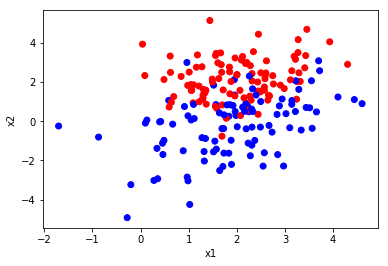

In [188]:
plt.scatter(X[:,0], X[:, 1], c = y, cmap = cm_bright)
plt.xlabel("x1")
plt.ylabel("x2")

## Linear SVM

- 大家尝试先用线性核的SVM来训练样本，计算precision，recall，f1等参量
- 尝试用mlxtend的plot decision boundary 画出分类器的决策边界

In [190]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [ ]:
linear_svc = ?

## SVM with rbf kernel

In [1]:
# 同学们，可以试试高斯核函数，set gamma = 2， C = 0.1 做和线性核同样的操作

In [196]:
## Play around with the paramter gamma and C
##  同学们可以自己先试试这几个paramter
## 看看SVM随着C和gamma怎么变化

C_list = [0.1, 1., 10.]
gamma_list = [0.2, 2., 20.]

## SVM 高斯核函数参数1: C

- 其中 C是惩罚系数，即对误差的宽容度
- C 越小， 正则化强度越大，容易欠拟合
- C 越大， 说明越不能容忍出现误差,容易过拟合

## SVM 高斯核函数参数2: gamma

- gamma是选择RBF函数作为kernel后，该函数自带的一个参数
- 隐含地决定了数据映射到新的特征空间后的分布
- gamma越大，单个样本对整个分类超平面的影响比较大，整个模型的支持向量也会多， 过拟合
- gamma值越小，单个样本对整个分类超平面的影响比较小，不容易被选择为支持向量，容易欠拟合

$$
k(x_1,x_2) = e^{-\frac{|x_1-x_2|^2}{2\sigma^2}} = e^{-\gamma (x_1-x_2)^2}
$$ 

## 多类分类：multiclass classficiation

- OVO
- OVR
- 同学们尝试用如下的数据集做一下多类分类

In [264]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [269]:
X2, Y2 = make_blobs(n_samples=200, n_features = 2, centers = 5, random_state=1,cluster_std = 1)

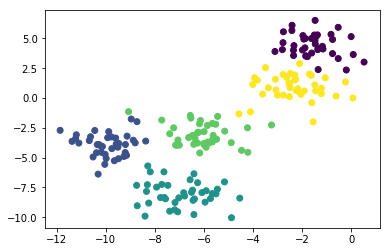

In [270]:
plt.scatter(X2[:,0], X2[:,1], c = Y2)
plt.show()

In [271]:
rbf_ovr = SVC(kernel = 'rbf', decision_function_shape = "ovr")

rbf_ovo = OneVsOneClassifier(SVC(kernel = "rbf"))

## SVR: 支持向量回归

- 同学们可以尝试用如下的数据集做一些支持向量回归

In [273]:
from sklearn.svm import SVR

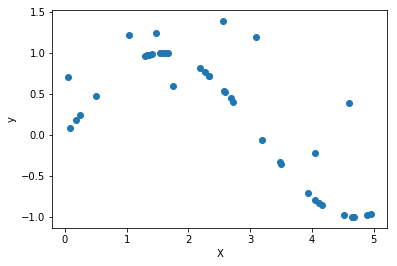

In [275]:
# 数据
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# 人为增加一些噪声
y[::5] += 3 * (0.5 - np.random.rand(8))

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

* 大家可以试试改变C的值，看看对模型有什么变化
* 还有其他参数，比如高斯核函数的gamma，多项式核函数的polynomial项